# Exploratory Data Analysis, OLS Regressions, and Results

In [1]:
#Import libraries+Set Seaborn Style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from stargazer.stargazer import Stargazer
from pandas.plotting import table
from IPython.display import display, Latex

In [2]:
#Load data
data = pd.read_csv('Data/stata_data.csv')
data.head()

,CI,ISF,NASDAQ,NYSE,Other,one_m_diff_volume,three_m_diff_volume,six_m_diff_volume,one_y_diff_volume,one_m_diff_shareprice,three_m_diff_shareprice,six_m_diff_shareprice,one_y_diff_shareprice
0,1,0,1,0,0,-27.602686,-28.601259,-12.906301,63.017803,8.876830,-14.281478,-17.272690,-36.492656
1,1,1,1,0,0,219.559358,-45.717575,150.587447,12.873300,-7.515141,-40.482228,-49.805155,-14.643252
2,0,0,0,1,0,-28.898357,23.709987,25.032663,43.315739,4.152021,-31.725230,-43.085234,-52.447342
3,0,1,0,1,0,-19.983171,247.877317,696.647198,544.352247,-23.834634,-89.095128,-95.190888,-69.921957
4,1,0,0,0,1,-96.741663,-94.926790,-98.501300,-94.113737,-7.085187,-17.569188,-20.093245,-33.146868


In [3]:
#Add Named Categorical Columns for CI, ISF, and Exchange for Graphs
data['Sharing Firm Introduced'] = np.where(data['ISF'] == 1, "Yes", "No")
data['Relatedness with Sharing Firm'] = np.where(data['CI'] == 1, "Closely Related", "Less Closely Related")
data['Exchange'] = data[['NASDAQ','NYSE','Other']].idxmax(axis=1)
data.head()

,CI,ISF,NASDAQ,NYSE,Other,one_m_diff_volume,three_m_diff_volume,six_m_diff_volume,one_y_diff_volume,one_m_diff_shareprice,three_m_diff_shareprice,six_m_diff_shareprice,one_y_diff_shareprice,Sharing Firm Introduced,Relatedness with Sharing Firm,Exchange
0,1,0,1,0,0,-27.602686,-28.601259,-12.906301,63.017803,8.876830,-14.281478,-17.272690,-36.492656,No,Closely Related,NASDAQ
1,1,1,1,0,0,219.559358,-45.717575,150.587447,12.873300,-7.515141,-40.482228,-49.805155,-14.643252,Yes,Closely Related,NASDAQ
2,0,0,0,1,0,-28.898357,23.709987,25.032663,43.315739,4.152021,-31.725230,-43.085234,-52.447342,No,Less Closely Related,NYSE
3,0,1,0,1,0,-19.983171,247.877317,696.647198,544.352247,-23.834634,-89.095128,-95.190888,-69.921957,Yes,Less Closely Related,NYSE
4,1,0,0,0,1,-96.741663,-94.926790,-98.501300,-94.113737,-7.085187,-17.569188,-20.093245,-33.146868,No,Closely Related,Other


In [4]:
#Create New Dataframes with Variables for Each Time Period
onemonthdata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'one_m_diff_volume', 'one_m_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]
threemonthdata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'three_m_diff_volume', 'three_m_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]
sixmonthdata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'six_m_diff_volume', 'six_m_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]
oneyeardata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'one_y_diff_volume', 'one_y_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]

## Regression Analysis for t = One Month
### Exploratory Data Analysis

In [5]:
one_m_summstats = onemonthdata.describe()

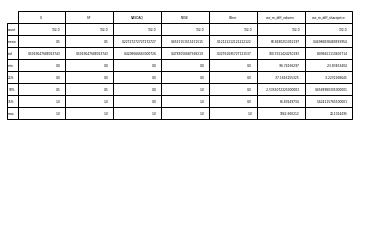

In [6]:
#Save table
plot = plt.subplot(111, frame_on=False)
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False)
table(plot, one_m_summstats,loc='upper right')
plt.savefig(r'Regression Output:Visualizations/Summary Statistics/one_m_summstats.png')

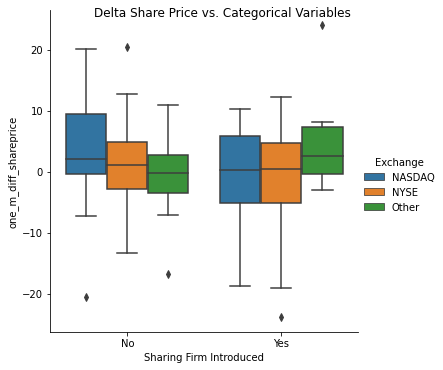

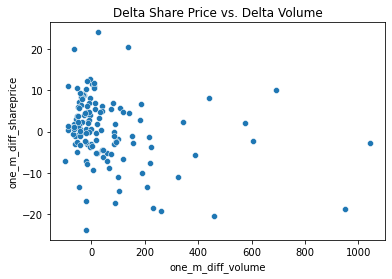

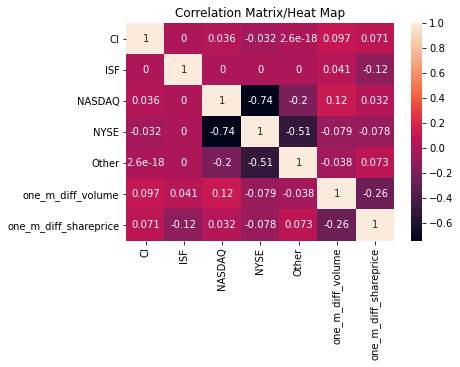

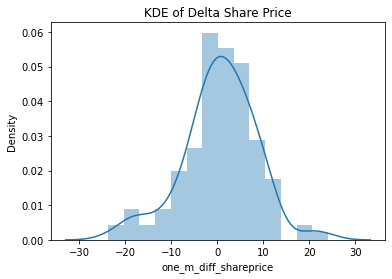

In [7]:
CATsvsOneM = sns.catplot(x="Sharing Firm Introduced", y="one_m_diff_shareprice",hue='Exchange',kind='box',data=onemonthdata)
CATsvsOneM.fig.suptitle('Delta Share Price vs. Categorical Variables')
CATsvsOneM.savefig("Regression Output:Visualizations/EDA Plots/One Month/onemonthcats.png")
plt.show()
VolumevsOneM = sns.scatterplot(x="one_m_diff_volume", y="one_m_diff_shareprice",data=onemonthdata).set_title('Delta Share Price vs. Delta Volume')
VolumevsOneM.figure.savefig("Regression Output:Visualizations/EDA Plots/One Month/onemonthvolume.png")
plt.show()
OneMHeatMap = sns.heatmap(onemonthdata.loc[:,'CI':'one_m_diff_shareprice'].corr(),annot=True).set_title("Correlation Matrix/Heat Map")
OneMHeatMap.figure.savefig("Regression Output:Visualizations/EDA Plots/One Month/onemonthheatmap.png")
plt.show()
OneMDistofSharePriceDiff = sns.distplot(onemonthdata['one_m_diff_shareprice']).set_title("KDE of Delta Share Price")
OneMDistofSharePriceDiff.figure.savefig("Regression Output:Visualizations/EDA Plots/One Month/onemonthkde.png")
plt.show()

### OLS Regression

In [8]:
onemresult1 = sm.ols(formula="one_m_diff_shareprice ~ ISF + CI", data=onemonthdata).fit(cov_type='HC1')

In [9]:
onemresult2 = sm.ols(formula="one_m_diff_shareprice ~ ISF + CI + one_m_diff_volume", data=onemonthdata).fit(cov_type='HC1')

In [10]:
onemresult3 = sm.ols(formula="one_m_diff_shareprice ~ ISF + CI + one_m_diff_volume + NASDAQ + NYSE", data=onemonthdata).fit(cov_type='HC1')

In [11]:
onemresult4 = sm.ols(formula="one_m_diff_shareprice ~ ISF + CI + one_m_diff_volume + NASDAQ + NYSE + ISF:CI + ISF:one_m_diff_volume + ISF:NASDAQ + ISF:NYSE", data=onemonthdata).fit(cov_type='HC1')

In [12]:
onemonthsummary = Stargazer([onemresult1, onemresult2, onemresult3, onemresult4])
onemonthsummary.covariate_order(['Intercept', 'ISF', 'CI', 'one_m_diff_volume','NASDAQ','NYSE','ISF:CI','ISF:one_m_diff_volume','ISF:NASDAQ','ISF:NYSE'])
onemonthsummary.add_custom_notes(['[1] Standard Errors are heteroscedasticity robust (HC1)'])
onemonthsummary

### Residual Plots

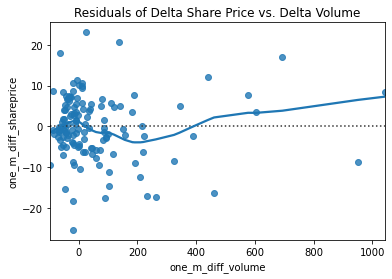

In [13]:
OneMResidvsVolume = sns.residplot(x='one_m_diff_volume',y='one_m_diff_shareprice',data=onemonthdata, robust=True, lowess=True).set_title("Residuals of Delta Share Price vs. Delta Volume")
OneMResidvsVolume.figure.savefig("Regression Output:Visualizations/EDA Plots/One Month/onemonthresidual.png")

## Regression Analysis for t = Three Months
### Exploratory Data Analysis

In [14]:
three_m_summstats = threemonthdata.describe()

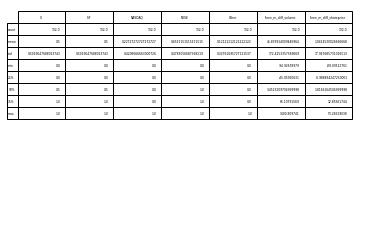

In [15]:
#Save table
plot = plt.subplot(111, frame_on=False)
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False)
table(plot, three_m_summstats,loc='upper right')
plt.savefig(r'Regression Output:Visualizations/Summary Statistics/three_m_summstats.png')

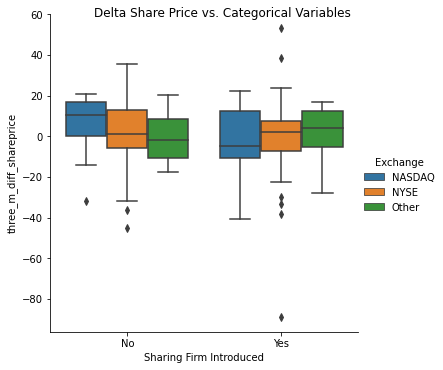

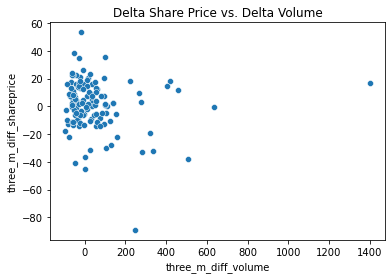

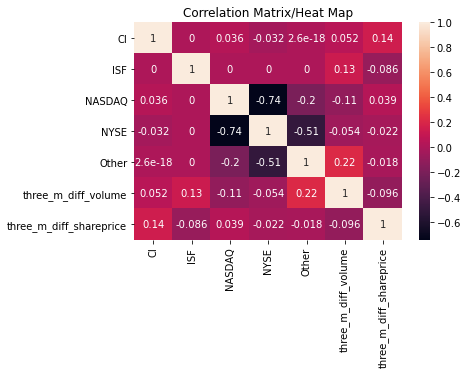

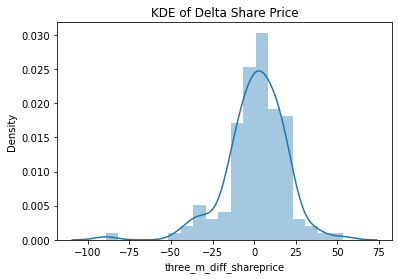

In [16]:
CATsvsThreeM = sns.catplot(x="Sharing Firm Introduced", y="three_m_diff_shareprice",hue='Exchange',kind='box',data=threemonthdata)
CATsvsThreeM.fig.suptitle('Delta Share Price vs. Categorical Variables')
CATsvsThreeM.savefig("Regression Output:Visualizations/EDA Plots/Three Month/threemonthcats.png")
plt.show()
VolumevsThreeM = sns.scatterplot(x="three_m_diff_volume", y="three_m_diff_shareprice",data=threemonthdata).set_title('Delta Share Price vs. Delta Volume')
VolumevsThreeM.figure.savefig("Regression Output:Visualizations/EDA Plots/Three Month/threemonthvolume.png")
plt.show()
ThreeMHeatMap = sns.heatmap(threemonthdata.loc[:,'CI':'three_m_diff_shareprice'].corr(),annot=True).set_title("Correlation Matrix/Heat Map")
ThreeMHeatMap.figure.savefig("Regression Output:Visualizations/EDA Plots/Three Month/threemonthheatmap.png")
plt.show()
ThreeMDistofSharePriceDiff = sns.distplot(threemonthdata['three_m_diff_shareprice']).set_title("KDE of Delta Share Price")
ThreeMDistofSharePriceDiff.figure.savefig("Regression Output:Visualizations/EDA Plots/Three Month/threemonthkde.png")
plt.show()

### OLS Regression

In [17]:
threemresult1 = sm.ols(formula="three_m_diff_shareprice ~ ISF + CI", data=threemonthdata).fit(cov_type='HC1')

In [18]:
threemresult2 = sm.ols(formula="three_m_diff_shareprice ~ ISF + CI + three_m_diff_volume", data=threemonthdata).fit(cov_type='HC1')

In [19]:
threemresult3 = sm.ols(formula="three_m_diff_shareprice ~ ISF + CI + three_m_diff_volume + NASDAQ + NYSE", data=threemonthdata).fit(cov_type='HC1')

In [20]:
threemresult4 = sm.ols(formula="three_m_diff_shareprice ~ ISF + CI + three_m_diff_volume + NASDAQ + NYSE + ISF:CI + ISF:three_m_diff_volume + ISF:NASDAQ + ISF:NYSE", data=threemonthdata).fit(cov_type='HC1')

In [21]:
threemonthsummary = Stargazer([threemresult1, threemresult2, threemresult3, threemresult4])
threemonthsummary.covariate_order(['Intercept', 'ISF', 'CI', 'three_m_diff_volume','NASDAQ','NYSE','ISF:CI','ISF:three_m_diff_volume','ISF:NASDAQ','ISF:NYSE'])
threemonthsummary.add_custom_notes(['[1] Standard Errors are heteroscedasticity robust (HC1)'])
threemonthsummary

### Residual Plots

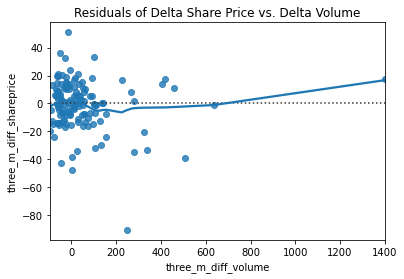

In [22]:
ThreeMResidvsVolume = sns.residplot(x='three_m_diff_volume',y='three_m_diff_shareprice',data=threemonthdata, robust=True, lowess=True).set_title("Residuals of Delta Share Price vs. Delta Volume")
ThreeMResidvsVolume.figure.savefig("Regression Output:Visualizations/EDA Plots/Three Month/threemonthresidual.png")

## Regression Analysis for t = Six Months
### Exploratory Data Analysis

In [23]:
six_m_summstats = sixmonthdata.describe()

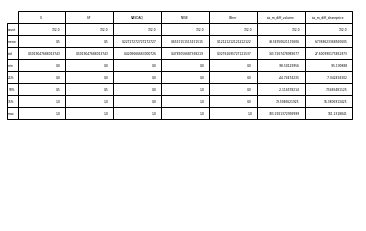

In [24]:
#Save table
plot = plt.subplot(111, frame_on=False)
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False)
table(plot, six_m_summstats,loc='upper right')
plt.savefig(r'Regression Output:Visualizations/Summary Statistics/six_m_summstats.png')

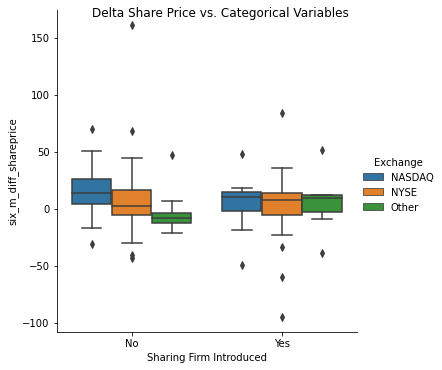

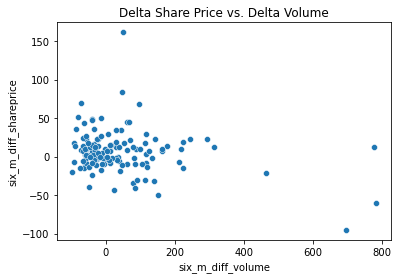

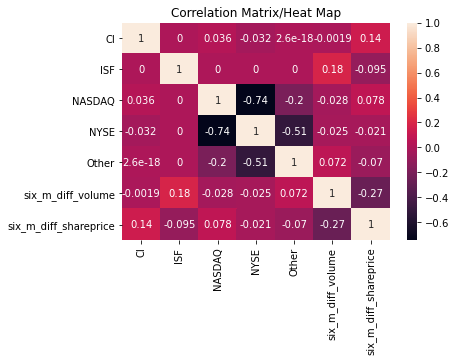

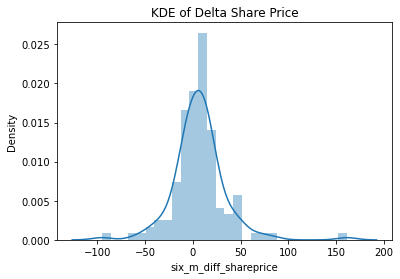

In [25]:
CATsvsSixM = sns.catplot(x="Sharing Firm Introduced", y="six_m_diff_shareprice",hue='Exchange',kind='box',data=sixmonthdata)
CATsvsSixM.fig.suptitle('Delta Share Price vs. Categorical Variables')
CATsvsSixM.savefig("Regression Output:Visualizations/EDA Plots/Six Month/sixmonthcats.png")
plt.show()
VolumevsSixM = sns.scatterplot(x="six_m_diff_volume", y="six_m_diff_shareprice",data=sixmonthdata).set_title('Delta Share Price vs. Delta Volume')
VolumevsSixM.figure.savefig("Regression Output:Visualizations/EDA Plots/Six Month/sixmonthvolume.png")
plt.show()
SixMHeatMap = sns.heatmap(sixmonthdata.loc[:,'CI':'six_m_diff_shareprice'].corr(),annot=True).set_title("Correlation Matrix/Heat Map")
SixMHeatMap.figure.savefig("Regression Output:Visualizations/EDA Plots/Six Month/sixmonthheatmap.png")
plt.show()
SixMDistofSharePriceDiff = sns.distplot(sixmonthdata['six_m_diff_shareprice']).set_title("KDE of Delta Share Price")
SixMDistofSharePriceDiff.figure.savefig("Regression Output:Visualizations/EDA Plots/Six Month/sixmonthkde.png")
plt.show()

### OLS Regression

In [26]:
sixmresult1 = sm.ols(formula="six_m_diff_shareprice ~ ISF + CI", data=sixmonthdata).fit(cov_type='HC1')

In [27]:
sixmresult2 = sm.ols(formula="six_m_diff_shareprice ~ ISF + CI + six_m_diff_volume", data=sixmonthdata).fit(cov_type='HC1')

In [28]:
sixmresult3 = sm.ols(formula="six_m_diff_shareprice ~ ISF + CI + six_m_diff_volume + NASDAQ + NYSE", data=sixmonthdata).fit(cov_type='HC1')

In [29]:
sixmresult4 = sm.ols(formula="six_m_diff_shareprice ~ ISF + CI + six_m_diff_volume + NASDAQ + NYSE + ISF:CI + ISF:six_m_diff_volume + ISF:NASDAQ + ISF:NYSE", data=sixmonthdata).fit(cov_type='HC1')

In [30]:
sixmonthsummary = Stargazer([sixmresult1, sixmresult2, sixmresult3, sixmresult4])
sixmonthsummary.covariate_order(['Intercept', 'ISF', 'CI', 'six_m_diff_volume','NASDAQ','NYSE','ISF:CI','ISF:six_m_diff_volume','ISF:NASDAQ','ISF:NYSE'])
sixmonthsummary.add_custom_notes(['[1] Standard Errors are heteroscedasticity robust (HC1)'])
sixmonthsummary

### Residual Plots

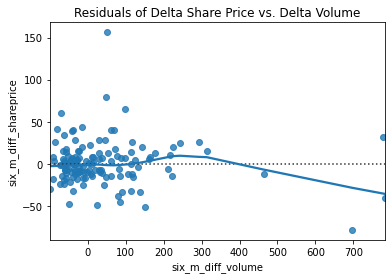

In [31]:
SixMResidvsVolume = sns.residplot(x='six_m_diff_volume',y='six_m_diff_shareprice',data=sixmonthdata, robust=True, lowess=True).set_title("Residuals of Delta Share Price vs. Delta Volume")
SixMResidvsVolume.figure.savefig("Regression Output:Visualizations/EDA Plots/Six Month/sixmonthresidual.png")

## Regression Analysis for t = One Year
### Exploratory Data Analysis

In [32]:
one_y_summstats = oneyeardata.describe()

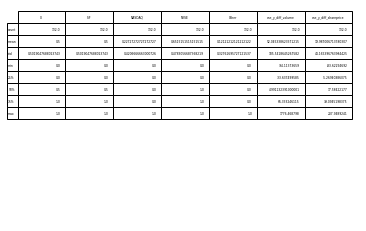

In [33]:
#Save table
plot = plt.subplot(111, frame_on=False)
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False)
table(plot, one_y_summstats,loc='upper right')
plt.savefig(r'Regression Output:Visualizations/Summary Statistics/one_y_summstats.png')

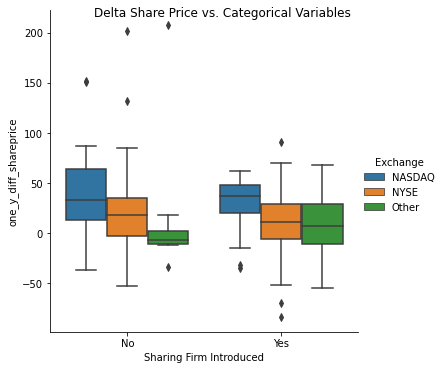

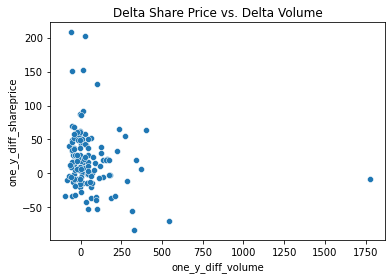

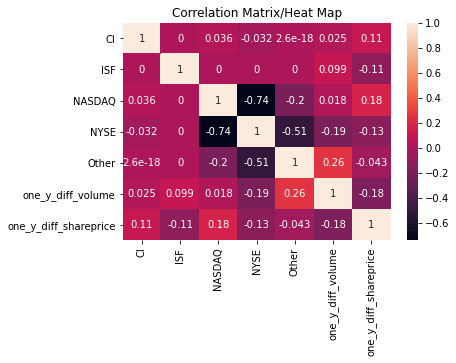

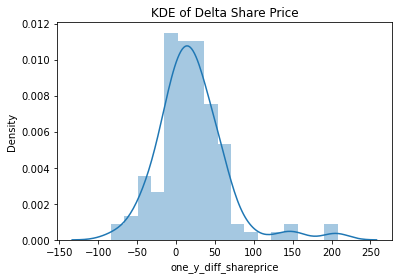

In [34]:
CATsvsOneY = sns.catplot(x="Sharing Firm Introduced", y="one_y_diff_shareprice",hue='Exchange',kind='box',data=oneyeardata)
CATsvsOneY.fig.suptitle('Delta Share Price vs. Categorical Variables')
CATsvsOneY.savefig("Regression Output:Visualizations/EDA Plots/One Year/oneyearcats.png")
plt.show()
VolumevsOneY = sns.scatterplot(x="one_y_diff_volume", y="one_y_diff_shareprice",data=oneyeardata).set_title('Delta Share Price vs. Delta Volume')
VolumevsOneY.figure.savefig("Regression Output:Visualizations/EDA Plots/One Year/oneyearvolume.png")
plt.show()
OneYHeatMap = sns.heatmap(oneyeardata.loc[:,'CI':'one_y_diff_shareprice'].corr(),annot=True).set_title("Correlation Matrix/Heat Map")
OneYHeatMap.figure.savefig("Regression Output:Visualizations/EDA Plots/One Year/oneyearheatmap.png")
plt.show()
OneYDistofSharePriceDiff = sns.distplot(oneyeardata['one_y_diff_shareprice']).set_title("KDE of Delta Share Price")
OneYDistofSharePriceDiff.figure.savefig("Regression Output:Visualizations/EDA Plots/One Year/oneyearkde.png")
plt.show()

### OLS Regression

In [35]:
oneyresult1 = sm.ols(formula="one_y_diff_shareprice ~ ISF + CI", data=oneyeardata).fit(cov_type='HC1')

In [36]:
oneyresult2 = sm.ols(formula="one_y_diff_shareprice ~ ISF + CI + NASDAQ + NYSE", data=oneyeardata).fit(cov_type='HC1')

In [37]:
oneyresult3 = sm.ols(formula="one_y_diff_shareprice ~ ISF + CI + NASDAQ + NYSE + one_y_diff_volume", data=oneyeardata).fit(cov_type='HC1')

In [38]:
oneyresult4 = sm.ols(formula="one_y_diff_shareprice ~ ISF + CI + one_y_diff_volume + NASDAQ + NYSE + ISF:CI + ISF:one_y_diff_volume + ISF:NASDAQ + ISF:NYSE", data=oneyeardata).fit(cov_type='HC1')

In [39]:
oneyearsummary = Stargazer([oneyresult1, oneyresult2, oneyresult3, oneyresult4])
oneyearsummary.covariate_order(['Intercept', 'ISF', 'CI', 'one_y_diff_volume','NASDAQ','NYSE','ISF:CI','ISF:one_y_diff_volume','ISF:NASDAQ','ISF:NYSE'])
oneyearsummary.add_custom_notes(['[1] Standard Errors are heteroscedasticity robust (HC1)'])
oneyearsummary

### Residual Plots

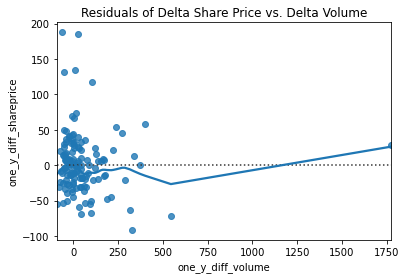

In [40]:
OneYResidvsVolume = sns.residplot(x='one_y_diff_volume',y='one_y_diff_shareprice',data=oneyeardata, robust=True, lowess=True).set_title("Residuals of Delta Share Price vs. Delta Volume")
OneYResidvsVolume.figure.savefig("Regression Output:Visualizations/EDA Plots/One Year/oneyearresidual.png")